# **Details on DataSet**
This dataset contains information on all 800 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset includes ID, name, type, hit point, the base modifier for normal attacks, the base damage resistance against normal attacks, special attack, the base damage resistance against special attacks, determines which Pokemon attacks first each round, number of generation, and legendary Pokemon.



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pokemon/PokemonData.csv
/kaggle/input/pokemon/README.md
/kaggle/input/d/salmafirdausi/pokemon/Pokemon.csv


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Import Data

In [4]:
pokemon = pd.read_csv('/kaggle/input/d/salmafirdausi/pokemon/Pokemon.csv')

In [5]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [6]:
print("The number of sample in dataset is {}.".format(pokemon.shape[0]))

The number of sample in dataset is 800.


In [7]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# Check Data quality

In [8]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


We have one column with the name # which we need to drop

In [9]:
#Checking the type of categories in Type1
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Type 1 is a type that determines weakness/resistance to attacks. There are several categories in type 1 namely Grass, Fire, Water, Bug, Normal, Poison, Electric, Ground, Fairy, Fighting, Psychic, Rock, Ghost, Ice, Dragon, Dark, Steel, and Flying.

In [10]:
# checking the categories in type 2
pokemon['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Some Pokemon are dual type and have 2. There are several categories in type 1 namely Poison, Flying, Dragon, Ground, Fairy, Grass, Fightin, Psychic, Steel, Ice, Rock, Dark, Water, Electric, Fire, Ghost, Bug, and Normal.

In [11]:
# lets check how many nan value each column have
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

There are 386 null data in type 2.

[](http://)

In [12]:
print('Percentage of missing "Type 2" record is %.2f%%' %((pokemon['Type 2'].isnull().sum()/pokemon.shape[0])*100))

Percentage of missing "Type 2" record is 48.25%


Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64


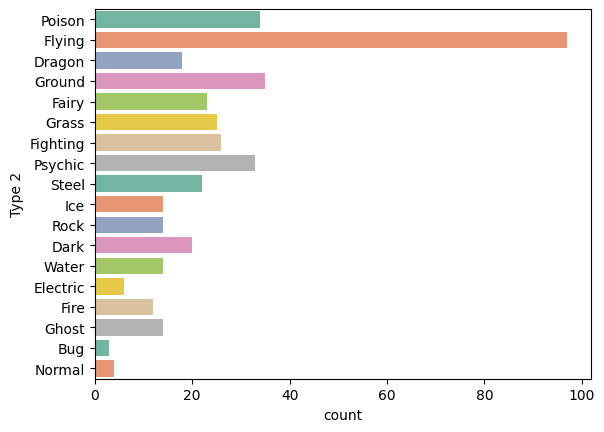

In [13]:
print(pokemon['Type 2'].value_counts())
sns.countplot(y='Type 2', data=pokemon, palette='Set2')
plt.show()

Since we have 48.25% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

In [14]:
pokemon.drop(columns='Type 2',inplace=True)

In [15]:
pokemon

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


Since we do not have use of null column so we will eliminate this column as well.

# Data Visulization

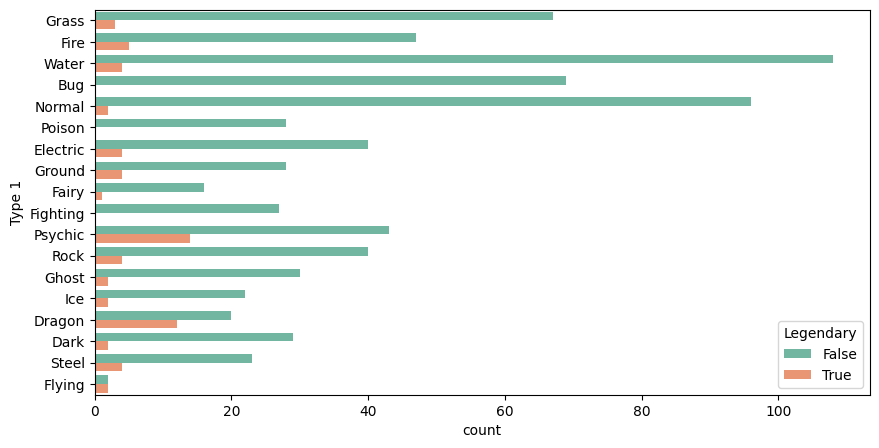

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=pokemon,y='Type 1',hue='Legendary',palette='Set2')
plt.title="type with legendary"

Psychic and Dragon type are more probable to be legendary.

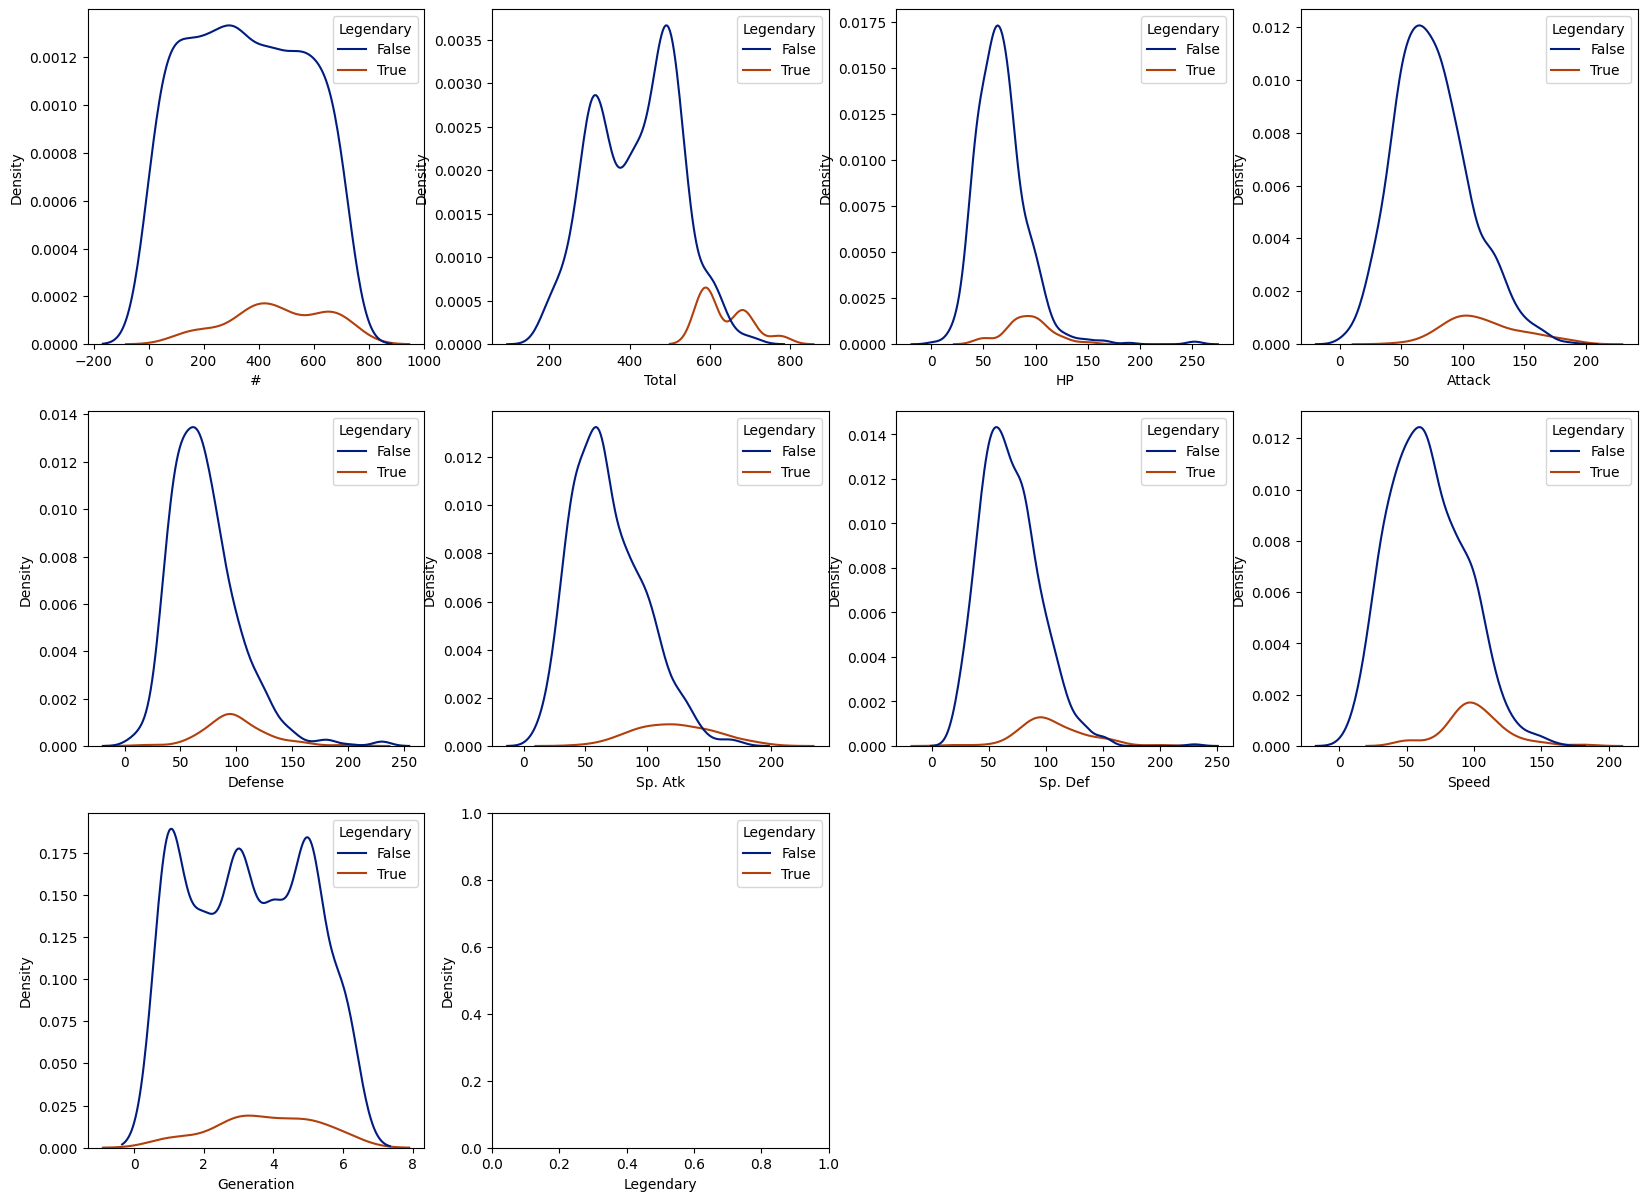

In [17]:
num_col=pokemon.drop(columns=['Name', 'Type 1'])
fig= plt.figure(figsize=(20,20))

for i, var in enumerate(num_col):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(data=num_col,x=var,hue='Legendary',palette='dark')

plt.show()

<Axes: xlabel='count', ylabel='Generation'>

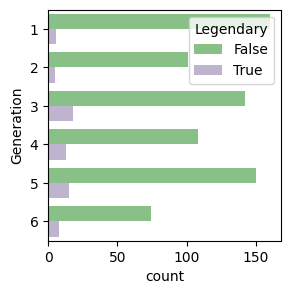

In [18]:
plt.figure(figsize=(3,3))
sns.countplot(data=pokemon,y='Generation',hue='Legendary',palette='Accent')

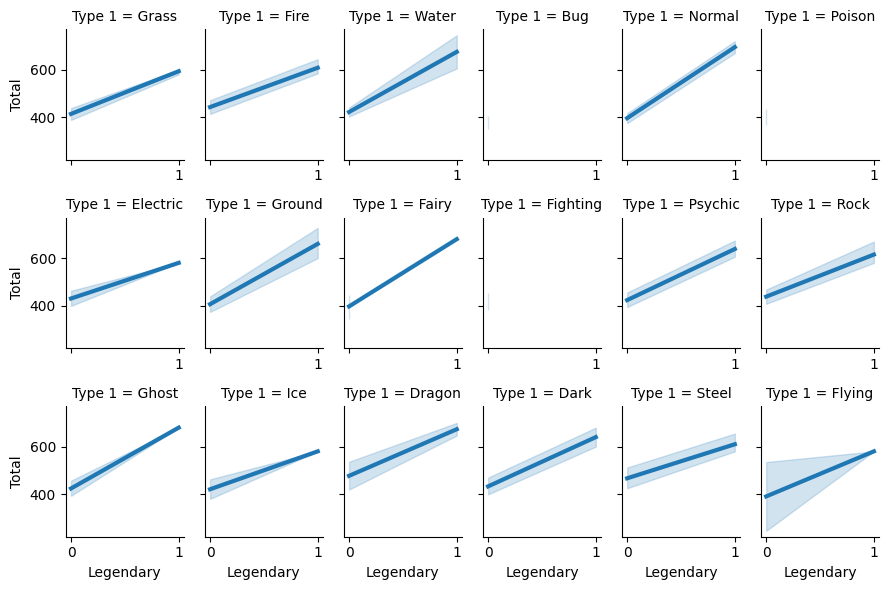

In [19]:
sns.relplot(data=pokemon, kind="line",x="Legendary", y="Total",col="Type 1", col_wrap=6,height=2, aspect=.75, linewidth=3)

No matter what the type the pokemon is, legendary will have higher total points.

# Data Preprocessing

In [20]:
pokemon.sample(5)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
514,463,Lickilicky,Normal,515,110,85,95,80,95,50,4,False
191,177,Natu,Psychic,320,40,50,45,70,45,70,2,False
601,541,Swadloon,Bug,380,55,63,90,50,80,42,5,False
202,187,Hoppip,Grass,250,35,35,40,35,55,50,2,False
355,324,Torkoal,Fire,470,70,85,140,85,70,20,3,False


One hot encoding for Type column.
Label Encoding for Legendary column.

In [21]:
pokemon.rename(columns={'Type 1':'Type'},inplace=True)

pokemon_coded = pd.get_dummies(pokemon,columns=['Type'],drop_first=True)

In [22]:
pokemon_coded.sample(5)

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
213,198,Murkrow,405,60,85,42,85,42,91,2,...,False,False,False,False,False,False,False,False,False,False
151,140,Kabuto,355,30,80,90,55,45,55,1,...,False,False,False,False,False,False,False,True,False,False
41,36,Clefable,483,95,70,73,95,90,60,1,...,False,False,False,False,False,False,False,False,False,False
537,480,Uxie,580,75,75,130,75,130,95,4,...,False,False,False,False,False,False,True,False,False,False
664,603,Eelektrik,405,65,85,70,75,70,40,5,...,False,False,False,False,False,False,False,False,False,False


In [23]:
pokemon_coded.drop(columns=['Name'],inplace=True)

Label Encoding our Legendary column.

In [24]:
encoder = LabelEncoder()
Y= encoder.fit_transform(pokemon_coded['Legendary'])

In [25]:
X = pokemon_coded.drop(columns=['Legendary'])
X

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type_Dark,...,Type_Ghost,Type_Grass,Type_Ground,Type_Ice,Type_Normal,Type_Poison,Type_Psychic,Type_Rock,Type_Steel,Type_Water
0,1,318,45,49,49,65,65,45,1,False,...,False,True,False,False,False,False,False,False,False,False
1,2,405,60,62,63,80,80,60,1,False,...,False,True,False,False,False,False,False,False,False,False
2,3,525,80,82,83,100,100,80,1,False,...,False,True,False,False,False,False,False,False,False,False
3,3,625,80,100,123,122,120,80,1,False,...,False,True,False,False,False,False,False,False,False,False
4,4,309,39,52,43,60,50,65,1,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,False,...,False,False,False,False,False,False,False,True,False,False
796,719,700,50,160,110,160,110,110,6,False,...,False,False,False,False,False,False,False,True,False,False
797,720,600,80,110,60,150,130,70,6,False,...,False,False,False,False,False,False,True,False,False,False
798,720,680,80,160,60,170,130,80,6,False,...,False,False,False,False,False,False,True,False,False,False


# Split Train Data and Test Data

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=25)

In [27]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Model Building

**Logistic Regression**

In [28]:
log = LogisticRegression()
log.fit(x_train_scaled,y_train)

LogisticRegression()

In [29]:
log_pred = log.predict(x_test_scaled)
accuracy_score(y_test,log_pred)*100

96.25

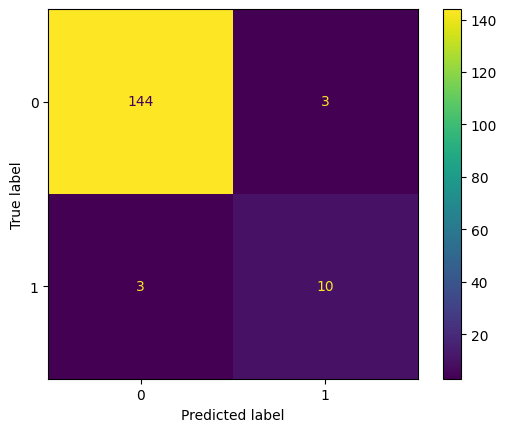

In [30]:
confusion_matrix = metrics.confusion_matrix(y_test,log_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

**Decision Tree**

In [31]:
dtree= tree.DecisionTreeClassifier()
dtree.fit(x_train_scaled,y_train)

dtree_pred = dtree.predict(x_test_scaled)
accuracy_score(y_test,dtree_pred)*100

94.375

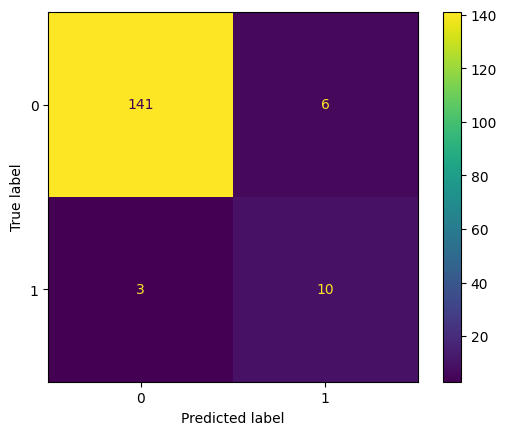

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test,dtree_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

**Random Forest**

In [33]:
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)

rf_pred = rf.predict(x_test_scaled)
accuracy_score(y_test, rf_pred)*100

95.0

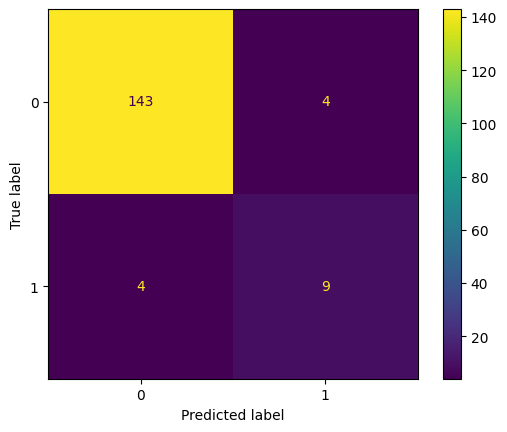

In [34]:
confusion_matrix = metrics.confusion_matrix(y_test,rf_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

**Naive Bayes**

In [35]:
nb = GaussianNB()
nb.fit(x_train_scaled,y_train)

nb_pred = nb.predict(x_test_scaled)
accuracy_score(y_test, nb_pred)*100

30.0

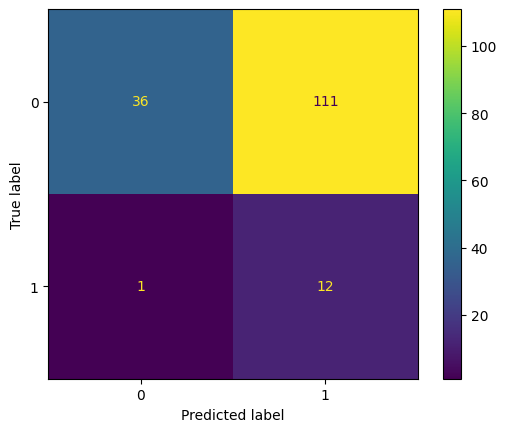

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test,nb_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

**KNN**

In [37]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train_scaled,y_train)
knn_pred = knn.predict(x_test_scaled)
accuracy_score(y_test, knn_pred)*100

93.125

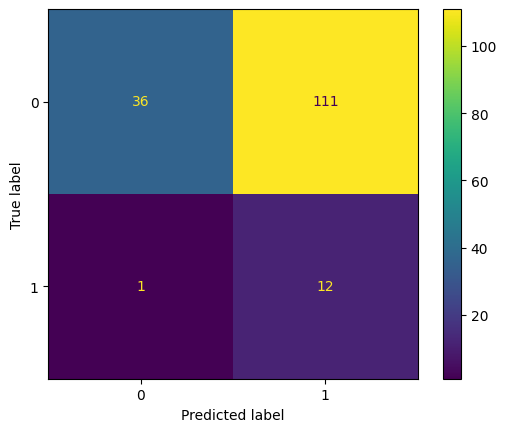

In [38]:
confusion_matrix = metrics.confusion_matrix(y_test,nb_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

**SVM**

In [39]:
svm = SVC()
svm.fit(x_train_scaled,y_train)

svm_pred = svm.predict(x_test_scaled)
accuracy_score(y_test, svm_pred)*100

92.5

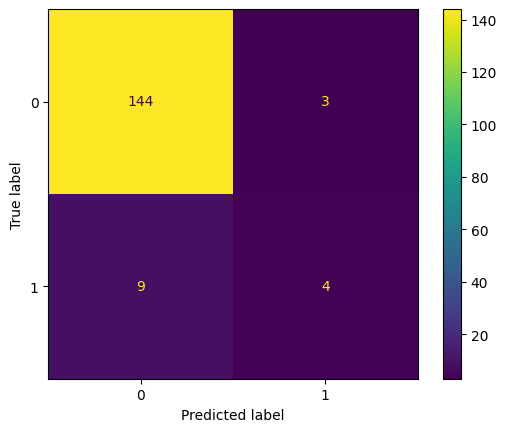

In [40]:
confusion_matrix = metrics.confusion_matrix(y_test,svm_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1]).plot()
plt.show()

# Conclusion

Using the logistic regression model has an accuracy rate of 96.25%, decision tree has an accuracy rate of 93.75%, random forest has an accuracy rate of 93.125%, naive bayes has an accuracy rate of 30%, KNN has an accuracy rate of 93.125%, and SVM has an accuracy rate of 92.5%. In this case, using the random forest and KNN methods will have the same accuracy rate of 93.125%. It can be concluded that using the logistic regression model has the highest accuracy rate of 96.25%.
